# quant-econ Solutions: The McCall Job Search Model

Solutions for http://quant-econ.net/jl/mccall_model.html

## Exercise 1

Our task is to implement a function that computes the reservation wage, using the logic discussed in the lecture.  Its argument should be an instance of McCallModel.

Here is one solution.  It uses `searchsortedfirst` to obtain the first $w$ in the set of possible wages such that $V(w) > U$.

The code assumes that the file `mccall_bellman_iteration.jl` is in the same directory as this notebook.

In [1]:
#=
Compute the reservation wage in the McCall model.

=#

include("mccall_bellman_iteration.jl")

"""
Computes the reservation wage of an instance of the McCall model
by finding the smallest w such that V(w) > U.

If V(w) > U for all w, then the reservation wage w_bar is set to
the lowest wage in mcm.w_vec.

If v(w) < U for all w, then w_bar is set to np.inf.

Parameters
----------
mcm : an instance of McCallModel
return_values : bool (optional, default=false)
    Return the value functions as well 

Returns
-------
w_bar : scalar
    The reservation wage
    
"""
function compute_reservation_wage(mcm; return_values=false)

    V, U = solve_mccall_model(mcm)
    w_idx = searchsortedfirst(V - U, 0)  

    if w_idx == length(V)
        w_bar = Inf
    else
        w_bar = mcm.w_vec[w_idx]
    end

    if return_values == false
        return w_bar
    else
        return w_bar, V, U
    end

end

compute_reservation_wage (generic function with 1 method)

Here's a sample of useage:

In [2]:
mcm = McCallModel()
compute_reservation_wage(mcm)

11.525423728813559

## Exercise 2

We want to plot $\bar w$ againsts $\gamma$.  Here's some suitable code:

[Plots.jl] Initializing backend: pyplot


QGtkStyle could not resolve GTK. Make sure you have installed the proper libraries.



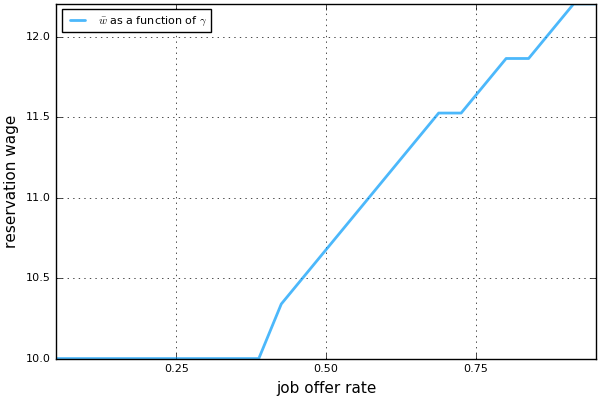

In [3]:
using Plots, LaTeXStrings
pyplot()

grid_size = 25  
gamma_vals = linspace(0.05, 0.95, grid_size)  
w_bar_vals = similar(gamma_vals)

mcm = McCallModel()

for (i, gamma) in enumerate(gamma_vals)
    mcm.gamma = gamma
    w_bar = compute_reservation_wage(mcm)
    w_bar_vals[i] = w_bar
end

plot(gamma_vals, 
    w_bar_vals, 
    lw=2, 
    alpha=0.7, 
    xlabel="job offer rate",
    ylabel="reservation wage",
    label=L"$\bar w$ as a function of $\gamma$")

As expected, the reservation wage increases in $\gamma$.

This is because higher $\gamma$ translates to a more favorable job search environment.

Hence workers are less willing to accept lower offers.